## Simple Linear Regression with ML

### Import the relevant libraries

In [2]:
# We must always import the relevant libraries for our problem at hand. NumPy is a must for this example.
import numpy as np

# matplotlib and mpl_toolkits are not necessary. We employ them for the sole purpose of visualizing the results.  
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

## Generate random data

In [3]:
# define the input variables in the form of observation x 1 matrix
observations = 1000
xs = np.random.uniform(-10,10, size =(observations,1))
zs = np.random.uniform(-10,10, size = (observations,1))

#combine the input variables into inputs matrix
inputs = np.column_stack((xs,zs))

# check the sshapes of the variables
xs.shape, zs.shape, inputs.shape

((1000, 1), (1000, 1), (1000, 2))

In [5]:
#define the random noise matrix
noise = np.random.uniform(-1,1,size= (observations,1))
#confirm the dimension
noise.shape

(1000, 1)

In [7]:
#create the target matrix
target = xs * 2 + zs*3 + 5 + noise

#confirm the dimension of the target matrix
target.shape

(1000, 1)

In [8]:
#reshape the target since numpy's default format is rows
targets = target.reshape(observations,)

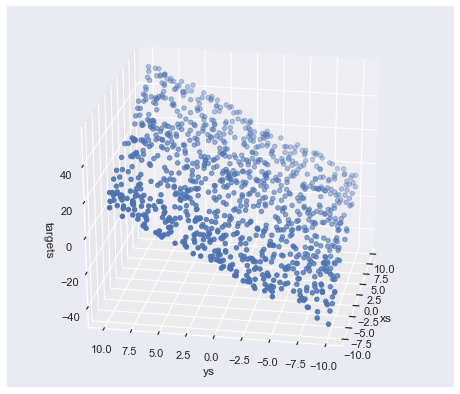

In [20]:
#check the relationship between the xs, zs, and the target visually
fig = plt.figure(figsize=(8,7))
ax1 = fig.add_subplot(111, projection='3d' )
ax1.scatter(xs,zs, targets)
ax1.set_xlabel('xs')
ax1.set_ylabel('ys')
ax1.set_zlabel('targets')
#azim is rotation around z and elev is rotation around y
ax1.view_init(azim=190, elev=25)

In [21]:
#initialize the weights and biases

#radius of the initial range
init_range = 0.1

#initiate the weights and the biases to test
weights = np.random.uniform(-init_range, init_range, size=(2,1))

biases = np.random.uniform(-init_range,init_range, size=1)

#check the results
print ('weight is ', weights, 'biases is ', biases)

weight is  [[ 0.00074891]
 [-0.04243017]] biases is  [0.02189089]


In [22]:
#set a learning rate small enough and big enough
#(to avoid oscillations near the trough, and fast enough to avoid slow process)
learning_rate = 0.02

In [23]:
#Train the model
#set the number of epochs to 100
EPOCH=100
for i in range(EPOCH):
    outputs = np.dot(inputs , weights) + biases
    deltas = outputs - target
    
    #calculate the loss function
    loss = np.sum(deltas ** 2) / 2 / observations
    
    #print the loss function
    print (loss)
    
    #scale the deltas
    deltas_scaled = deltas / observations
    
    #update the biases
    weights = weights -learning_rate * np.dot(inputs.T, deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

230.55808656742937
36.77108394412417
14.281306163501057
11.320793797860345
10.60444163020061
10.15951613999593
9.76001585475286
9.379517215844182
9.014448049272799
8.663874314198853
8.327185057252487
8.003826321495831
7.693269845992686
7.39500871640309
7.108556137400548
6.833444592222572
6.5692250743637635
6.3154663541510345
6.071754274868929
5.83769107681116
5.612894748100601
5.396998401211959
5.189649674178797
4.990510155507609
4.799254831860267
4.615571557603451
4.439160545359328
4.269733876725994
4.107015032369117
3.9507384407179047
3.800649044528757
3.6565018846092454
3.5180617000230177
3.3851025441230993
3.25740741578695
3.1347679052513984
3.0169838539694585
2.903863027933822
2.7952208039339594
2.6908798682346515
2.5906699271842877
2.4944274292805213
2.401995298239738
2.31322267663464
2.227964679681558
2.14608215877565
2.067441474388047
1.9919142779543066
1.9193773023981735
1.8497121609488063
1.7828051539230578
1.7185470831575398
1.6568330737875285
1.597562403081904
1.54063833605

In [26]:
# print the weights and the biases to see if they have converged.
print(weights, biases)


[[1.99525378]
 [3.00233297]] [4.30364045]


In [27]:
#plot the outputs and the targets to see if the model learned as expected
targets.shape, outputs.shape

((1000,), (1000, 1))

Text(0, 0.5, 'outputs')

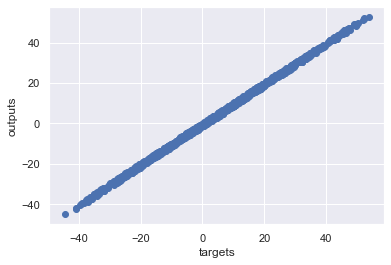

In [28]:
#the graph should look a line with a slope of 1 if successful
plt.scatter(targets,outputs)
plt.xlabel('targets')
plt.ylabel('outputs')

### Our model successfully learned the relationship between the inputs

The actual weights were 